In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load dataset
dataset = pd.read_csv(r"C:\Users\Dell\Downloads\emp_sal.csv")
dataset

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000
5,Region Manager,6,150000
6,AVP,7,200000
7,VP,8,300000
8,CTO,9,500000
9,CEO,10,1000000


In [4]:
# Independent & Dependent variables
x = dataset.iloc[:,1:2].values # Experience
y = dataset.iloc[:,2].values # Salary

In [7]:
# Train-test-split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [15]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

for n in [10,50,100,200]:
     regressor = RandomForestRegressor(n_estimators=n, random_state=0)
     regressor.fit(x_train,y_train)
     y_pred = regressor.predict(x_test)
     print(n, r2_score(y_test, y_pred))

10 0.9627995867768595
50 0.992946694214876
100 0.990683367768595
200 0.9959098140495868


In [17]:
for depth in range(1,6):
    regressor = RandomForestRegressor(n_estimators = 200,max_depth = depth, random_state = 0)
    regressor.fit(x_train,y_train)
    y_pred = regressor.predict(x_test)
    print(depth, r2_score(y_test,y_pred))

1 0.8854263906924577
2 0.987473015364942
3 0.9959612423955464
4 0.9959019168962351
5 0.9959098140495868


In [79]:
regressor = RandomForestRegressor(n_estimators=100,max_depth = 3,min_samples_split=2,min_samples_leaf=2,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=2, random_state=0)

In [80]:
y_pred = regressor.predict(x_test)

In [81]:
y_65 = regressor.predict([[6.5]])
print("Predicted Salary for 6.5 years : ",y_65)

Predicted Salary for 6.5 years :  [207092.91666667]


C:\Users\Dell\AppData\Local\Temp\ipykernel_4772\1052366368.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x_train),max(x_train),0.1).reshape(-1,1)


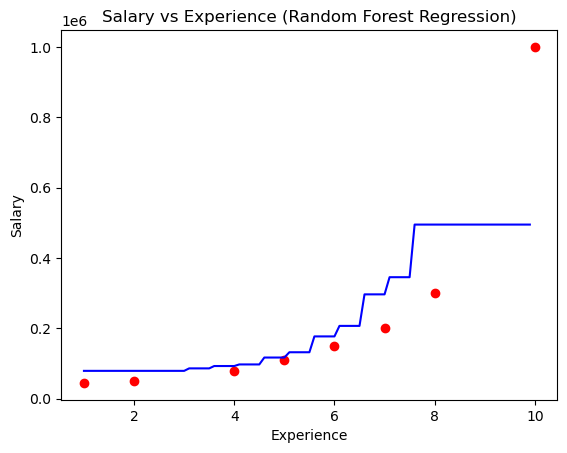

In [82]:
# Visualization (smooth curve)
x_grid = np.arange(min(x_train),max(x_train),0.1).reshape(-1,1)

plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Salary vs Experience (Random Forest Regression)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [83]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [84]:
print(mse)
print(r2)

198167909.2013882
0.9959056217107152
